## [1] load packages 
- bioplux: 400
- eeg: 128
- eyetracking: 256

In [2]:
import numpy as np
import sys
import h5py
import pandas as pd
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
#from scipy import signal
from datetime import datetime

## [2] load dataset

### 2.1 set the number of subject

In [ ]:
number_subject=['P1'] # ex) P1, P2, P3, ... P40

In [29]:
f_path = r'C:\Users\minisim\Desktop\AV-HDV\Raw data'
list_file1=['time_frame', '1. sim', '2. bio']
list_file2=['bio','eeg','eye']
list_file3=['S1','S2','S3']

### 2.2 load the time fromae

In [30]:
time = pd.read_csv(os.path.join(f_path, number_subject[0],  list_file1[0] + '.csv'))
time

,Unnamed: 0,name,time
0,0,start1,2023-01-18 07:28:18.085125
1,1,d_start1,2023-01-18 07:28:35.168833
2,2,end1,2023-01-18 07:28:40.560416
3,3,d_end1,2023-01-18 07:28:38.533628
4,4,start2,2023-01-18 07:28:53.925402
5,5,d_start2,2023-01-18 07:29:00.146266
6,6,end2,2023-01-18 07:29:07.260469
7,7,d_end2,2023-01-18 07:29:03.348703
8,8,start3,2023-01-18 07:29:27.761305
9,9,d_start3,2023-01-18 07:29:32.995167


In [31]:
start1 = time.iloc[0,2]
end1 = time.iloc[2,2]
d_start1 = time.iloc[1,2]
d_end1 = time.iloc[3,2]

start2 = time.iloc[4,2]
end2 = time.iloc[6,2]
d_start2 = time.iloc[5,2]
d_end2 = time.iloc[7,2]

start3 = time.iloc[8,2]
end3 = time.iloc[10,2]
d_start3 = time.iloc[9,2]
d_end3 = time.iloc[11,2]

In [ ]:
a = pd.date_range(start=start1, end=end1, periods=eye.shape[0])
timeframe = pd.DataFrame(a, columns = ['timeframe'])
eye = pd.concat((timeframe, eye), axis=1)

In [171]:
def add_timeframe(dataset, start, end):
    a = pd.date_range(start=start, end=end, periods=dataset.shape[0])
    timeframe = pd.DataFrame(a, columns = ['timeframe'])
    dataset = pd.concat((timeframe, dataset), axis=1)
    return dataset

### 2.1. eyetracking

In [197]:
def pre_eye(dataset):
    dataset=dataset.iloc[:,[0,1,2,6]] #13: diameter 
#- diameter: diameter of the pupil in image pixels as observed in the eye - image frame (is not corrected for perspective)
    left_eye =  dataset.loc[dataset['eye_id']==0].reset_index()
    left_eye = left_eye.iloc[:,[1,2,4]]
    left_eye.columns= ['pupil_timestamp', 'world_index', 'left_diameter']

    right_eye =  dataset.loc[dataset['eye_id']==1].reset_index()
    right_eye = right_eye.iloc[:,[1,2,4]]
    right_eye.columns= ['pupil_timestamp', 'world_index', 'right_diameter']

    eye = pd.concat((left_eye,right_eye['right_diameter']), axis=1).dropna()
    return eye

In [ ]:
eye1 = pd.read_csv(os.path.join(f_path, number_subject[0], list_file1[2], list_file2[2], list_file3[0]  , 'pupil_positions.csv'))
eye1 = pre_eye(eye1)
eye1 = add_timeframe(eye1, start1, end1)

In [ ]:
eye2 = pd.read_csv(os.path.join(f_path, number_subject[0], list_file1[2], list_file2[2], list_file3[1]  , 'pupil_positions.csv'))
eye2 = pre_eye(eye2)
eye2 = add_timeframe(eye2, start2, end2)

In [88]:
eye3 = pd.read_csv(os.path.join(f_path, number_subject[0], list_file1[2], list_file2[2], list_file3[2]  , 'pupil_positions.csv'))
eye3 = pre_eye(eye3)
eye3 = add_timeframe(eye3, start3, end3)

### 2.2. eeg

In [105]:
def pre_eeg(dataset):
    dataset = dataset.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
    dataset.columns= ["AF3", "F7", "F3", "FC5", "T7", "P7","O1","O2","P8","T8","FC6","F4","F8","AF4"]
    return dataset

In [106]:
eeg1 = pd.read_csv(os.path.join(f_path, number_subject[0], list_file1[2], list_file2[1], list_file3[0]  + '.csv'), sep=",", header=None, skiprows=1)
eeg1 = pre_eeg(eeg1)
eeg1 = add_timeframe(eeg1, start1, end1)

In [ ]:
eeg2 = pd.read_csv(os.path.join(f_path, number_subject[0], list_file1[2], list_file2[1], list_file3[1]  + '.csv'), sep=",", header=None, skiprows=1)
eeg2 = pre_eeg(eeg2)
eeg2 = add_timeframe(eeg2, start2, end2)

In [ ]:
#dataset = pd.read_csv(f_path)
eeg3 = pd.read_csv(os.path.join(f_path, number_subject[0], list_file1[2], list_file2[1], list_file3[2]  + '.csv'), sep=",", header=None, skiprows=1)
eeg3 = pre_eeg(eeg3)
eeg3 = add_timeframe(eeg3, start3, end3)

### 2.3. plux biosignal

In [107]:
def pre_biop(dataset):
    dataset = dataset.iloc[:,[2,3,4,5,6,7,8]]
    dataset.columns= ["ECG", "SpO2i", "SpO2ii", "EDA", "EMG", "%SpO2","BVP"]
    return dataset

In [108]:
biop1 = pd.read_csv(os.path.join(f_path, number_subject[0], list_file1[2], list_file2[0], list_file3[0]  + '.txt'), sep="\t", header=None, skiprows=3)
biop1 = pre_biop(biop1)
biop1 = add_timeframe(biop1, start1, end1)

In [ ]:
biop2 = pd.read_csv(os.path.join(f_path, number_subject[0], list_file1[2], list_file2[0], list_file3[0]  + '.txt'), sep="\t", header=None, skiprows=3)
biop2 = pre_biop(biop2)
biop2 = add_timeframe(biop2, start2, end2)

In [ ]:
biop3 = pd.read_csv(os.path.join(f_path, number_subject[0], list_file1[2], list_file2[0], list_file3[0]  + '.txt'), sep="\t", header=None, skiprows=3)
biop3 = pre_biop(biop3)
biop3 = add_timeframe(biop3, start3, end3)

- ECG(Electrocardiography) :  recording of the heart's electrical activity.
- EDA(Electrodermal activity, GSR): detecting the state of sweat glands in the skin(Sweating is controlled by the sympathetic nervous system).
- SPO2: measuring the oxygen saturation level
- EMG(Electromuograhpy): recording the electrical activity produced by skeletal muscles.
- BVP(Blood Volume Pulse): measuring changes in the arterial translucency


### 2.4 simulator (loading + converting)

In [112]:
def covert_data1(dataset):
      result_list = []
      frame = dataset['frame']
      frames = pd.DataFrame(frame['frame'])
      time_elapsed = pd.DataFrame(np.array(range(0,len(frames)-1))/60)
      driver_data = dataset['data']
      ED_acc_pedal_pos = pd.DataFrame(driver_data['CFS_Accelerator_Pedal_Position']).transpose()
      ED_brake_pedal_force_kg = pd.DataFrame(driver_data['CFS_Brake_Pedal_Force']).transpose()*  0.45
      ED_steering_wheel_angle_deg = pd.DataFrame(driver_data['CFS_Steering_Wheel_Angle']).transpose()
      ED_steering_wheel_angle_rate_dps = pd.DataFrame(driver_data['CFS_Steering_Wheel_Angle_Rate']).transpose()
      ED_speed_mph = round(pd.DataFrame(driver_data['VDS_Veh_Speed'])* 0.447 , 2).transpose()
      Info = driver_data['SCC_Follow_Info']
      LV_ID = pd.DataFrame(Info[0])
      LV_time_gap_s = pd.DataFrame(Info[2])
      TTC = pd.DataFrame(Info[4])
      LV_spacing_m = round(pd.DataFrame(Info[1]) * 0.3048, 2) #m/s
      LV_frspacing_m = round(pd.DataFrame(Info[3]) * 0.3048, 2) #m/s
      LV_speed_mps = round(pd.DataFrame(Info[5]) * 0.3048, 2) #m/s
      lane = driver_data['SCC_Lane_Deviation']
      lane_or_cor = pd.DataFrame(lane[0])      
      lane_id = pd.DataFrame(lane[3])
      lane_offset_m = round(pd.DataFrame(lane[1]) * 0.3048, 3) #m/s
      lane_width_m = round(pd.DataFrame(lane[2]) * 0.3048, 2) #m/s
      position = driver_data['VDS_Chassis_CG_Position']
      ED_x_m = round(pd.DataFrame(position[1])* 0.3048, 3) #m/s
      ED_y_m = round(pd.DataFrame(position[0])* 0.3048, 2) #m/s     
      ED_z_m = round(pd.DataFrame(position[2])* 0.3048, 2) #m/s
      turn = pd.DataFrame(driver_data['CIS_Turn_Signal']).transpose()
      result = pd.concat([frames,time_elapsed,ED_acc_pedal_pos,ED_brake_pedal_force_kg,
                   ED_steering_wheel_angle_deg, ED_steering_wheel_angle_rate_dps,
                   ED_speed_mph, LV_ID, LV_time_gap_s ,TTC,
                   LV_spacing_m,LV_frspacing_m,LV_speed_mps,
                   lane_or_cor,lane_id,lane_offset_m,lane_width_m,
                   ED_x_m,ED_y_m,ED_z_m], axis=1)
      result.columns= ['frames','time_elapsed','ED_acc_pedal_pos','ED_brake_pedal_force_kg',
                   'ED_steering_wheel_angle_deg','ED_steering_wheel_angle_rate_dps',
                   'ED_speed_mph','LV_ID','LV_time_gap_s',"TTC",
                   'LV_spacing_m','LV_frspacing_m','LV_speed_mps',
                   'lane_or_cor','lane_id','lane_offset_m','lane_width_m',
                   'ED_x_m','ED_y_m','ED_z_m']
      result = result[2:-1]
      return result

In [113]:
def covert_data2(dataset, scenario):
      result_list = []
      frame = dataset['frame']
      frames = pd.DataFrame(frame['frame'])
      time_elapsed = pd.DataFrame(np.array(range(0,len(frames)-1))/60)
      driver_data = dataset['data']
      ED_acc_pedal_pos = pd.DataFrame(driver_data['CFS_Accelerator_Pedal_Position']).transpose()
      ED_brake_pedal_force_kg = pd.DataFrame(driver_data['CFS_Brake_Pedal_Force']).transpose()*  0.45
      ED_steering_wheel_angle_deg = pd.DataFrame(driver_data['CFS_Steering_Wheel_Angle']).transpose()
      ED_steering_wheel_angle_rate_dps = pd.DataFrame(driver_data['CFS_Steering_Wheel_Angle_Rate']).transpose()
      ED_speed_mph = round(pd.DataFrame(driver_data['VDS_Veh_Speed'])* 0.447 , 2).transpose()
      Info = driver_data['SCC_Follow_Info']
      LV_ID = pd.DataFrame(Info[0])
      LV_time_gap_s = pd.DataFrame(Info[2])
      TTC = pd.DataFrame(Info[4])
      LV_spacing_m = round(pd.DataFrame(Info[1]) * 0.3048, 2) #m/s
      LV_frspacing_m = round(pd.DataFrame(Info[3]) * 0.3048, 2) #m/s
      LV_speed_mps = round(pd.DataFrame(Info[5]) * 0.3048, 2) #m/s
      lane = driver_data['SCC_Lane_Deviation']
      lane_or_cor = pd.DataFrame(lane[0])      
      lane_id = pd.DataFrame(lane[3])
      lane_offset_m = round(pd.DataFrame(lane[1]) * 0.3048, 3) #m/s
      lane_width_m = round(pd.DataFrame(lane[2]) * 0.3048, 2) #m/s
      position = driver_data['VDS_Chassis_CG_Position']
      ED_x_m = round(pd.DataFrame(position[1])* 0.3048, 3) #m/s
      ED_y_m = round(pd.DataFrame(position[0])* 0.3048, 2) #m/s     
      ED_z_m = round(pd.DataFrame(position[2])* 0.3048, 2) #m/s
      turn = pd.DataFrame(driver_data['CIS_Turn_Signal']).transpose()
      result = pd.concat([frames,time_elapsed,ED_acc_pedal_pos,ED_brake_pedal_force_kg,
                   ED_steering_wheel_angle_deg, ED_steering_wheel_angle_rate_dps,
                   ED_speed_mph, LV_ID, LV_time_gap_s ,TTC,
                   LV_spacing_m,LV_frspacing_m,LV_speed_mps,
                   lane_or_cor,lane_id,lane_offset_m,lane_width_m,
                   ED_x_m,ED_y_m,ED_z_m], axis=1)
      result.columns= ['frames','time_elapsed','ED_acc_pedal_pos','ED_brake_pedal_force_kg',
                   'ED_steering_wheel_angle_deg','ED_steering_wheel_angle_rate_dps',
                   'ED_speed_mph','LV_ID','LV_time_gap_s',"TTC",
                   'LV_spacing_m','LV_frspacing_m','LV_speed_mps',
                   'lane_or_cor','lane_id','lane_offset_m','lane_width_m',
                   'ED_x_m','ED_y_m','ED_z_m']
      result = result[2:-1]

      frame = pd.DataFrame(dataset['dynobjs']['A1']['frames']) #frame
      lane = pd.DataFrame(dataset['data']['SCC_Lane_Deviation'][3]) #lane number 
      lead_AV = pd.DataFrame(dataset['dynobjs']['LeadAV']['speed']).transpose()/0.3048
      A1 = pd.DataFrame(dataset['dynobjs']['A1']['speed']).transpose()/0.3048
      A2 = pd.DataFrame(dataset['dynobjs']['A2']['speed']).transpose()/0.3048
      A3 = pd.DataFrame(dataset['dynobjs']['A3']['speed']).transpose()/0.3048
      H1 = pd.DataFrame(dataset['dynobjs']['H1']['speed']).transpose()/0.3048
      H2 = pd.DataFrame(dataset['dynobjs']['H2']['speed']).transpose()/0.3048
      H3 = pd.DataFrame(dataset['dynobjs']['H3']['speed']).transpose()/0.3048
      speed_info = pd.concat([frame, lane, lead_AV, A1, A2, A3, H1, H2, H3], axis=1)
      speed_info.columns= ['frame','lane','lead_AV','A1', 'A2', 'A3', 'H1', 'H2', 'H3']

      dev = pd.DataFrame(dataset['data']['SCC_Follow_Info'][0])
      dev.columns = ['lead_id']
      dev['lead_id_up'] = dev.lead_id.shift(-1)
      dev['diff'] = dev['lead_id'] - dev['lead_id_up'] 
      rest1_start = dev[(abs(dev['diff'])>2)&(dev['lead_id_up']==-1)].index[0]
      rest2_start = dev[(abs(dev['diff'])>2)&(dev['lead_id_up']==-1)].index[1]
      section3_end = dev[(abs(dev['diff'])>2)&(dev['lead_id_up']==-1)].index[2]
      zone1_start=dev[(abs(dev['diff'])>2)&(dev['lead_id_up']!=-1)].index[0]
      zone1_end= rest1_start-1
      rest1_end=dev[(abs(dev['diff'])>2)&(dev['lead_id_up']!=-1)].index[1]-1
      section1_start=dev[(abs(dev['diff'])>2)&(dev['lead_id_up']!=-1)].index[1]
      section1_end=dev[(abs(dev['diff'])>2)&(dev['lead_id_up']!=-1)].index[2]-1
      section2_start=dev[(abs(dev['diff'])>2)&(dev['lead_id_up']!=-1)].index[2]
      section2_end=rest2_start-1
      rest2_end=dev[(abs(dev['diff'])>2)&(dev['lead_id_up']!=-1)].index[3]-1
      section3_start=dev[(abs(dev['diff'])>2)&(dev['lead_id_up']!=-1)].index[3]
      section_info = (zone1_start, zone1_end,rest1_start,rest1_end,section1_start,section1_end,section2_start,section2_end,rest2_start,rest2_end,section3_start,section3_end)
      
      speed_info['section'] = 0
      speed_info['section'][section_info[0]:section_info[1]] = "Zone1"
      speed_info['section'][section_info[2]:section_info[3]] = "Rest1"
      speed_info['section'][section_info[4]:section_info[5]] = "Zone2(Section1)"
      speed_info['section'][section_info[6]:section_info[7]] = "Zone2(Section2)"
      speed_info['section'][section_info[8]:section_info[9]] = "Rest2"
      speed_info['section'][section_info[10]:section_info[11]] = "Zone2(Section3)"
      speed_info['section'][section_info[11]+1:] =  "Rest3"
      
      speed_info['lead']='0'

      if scenario == 'Unmarked':
        speed_info.loc[speed_info['section']=="Zone1", 'lead'] = "lead_AV"
        speed_info.loc[(speed_info['section']=="Zone2(Section1)")&(speed_info['lane']==0), 'lead'] = "A1"#A1
        speed_info.loc[(speed_info['section']=="Zone2(Section1)")&(speed_info['lane']==1), 'lead'] = "H1"#H1
        speed_info.loc[(speed_info['section']=="Zone2(Section2)")&(speed_info['lane']==0), 'lead'] = "A2"#A2
        speed_info.loc[(speed_info['section']=="Zone2(Section2)")&(speed_info['lane']==1), 'lead'] = "H2"#H2
        speed_info.loc[(speed_info['section']=="Zone2(Section3)")&(speed_info['lane']==0), 'lead'] = "H3"#H3
        speed_info.loc[(speed_info['section']=="Zone2(Section3)")&(speed_info['lane']==1), 'lead'] = "A3"#A3

      else:
        speed_info.loc[speed_info['section']=="Zone1", 'lead'] = "lead_AV"
        speed_info.loc[(speed_info['section']=="Zone2(Section1)")&(speed_info['lane']==0), 'lead'] = "H1"#H1
        speed_info.loc[(speed_info['section']=="Zone2(Section1)")&(speed_info['lane']==1), 'lead'] = "A1"#A1
        speed_info.loc[(speed_info['section']=="Zone2(Section2)")&(speed_info['lane']==0), 'lead'] = "A2"#A2
        speed_info.loc[(speed_info['section']=="Zone2(Section2)")&(speed_info['lane']==1), 'lead'] = "H2"#H2
        speed_info.loc[(speed_info['section']=="Zone2(Section3)")&(speed_info['lane']==0), 'lead'] = "H3"#H3
        speed_info.loc[(speed_info['section']=="Zone2(Section3)")&(speed_info['lane']==1), 'lead'] = "A3"#A3
        

      speed_info['lead_speed1']=0
      speed_info.loc[(speed_info['lead']=="lead_AV"), 'lead_speed1'] = speed_info.loc[(speed_info['lead']=="lead_AV"), 'lead_AV'] 
      speed_info.loc[(speed_info['lead']=="A1"), 'lead_speed1'] = speed_info.loc[(speed_info['lead']=="A1"), 'A1'] 
      speed_info.loc[(speed_info['lead']=="A2"), 'lead_speed1'] = speed_info.loc[(speed_info['lead']=="A2"), 'A2'] 
      speed_info.loc[(speed_info['lead']=="A3"), 'lead_speed1'] = speed_info.loc[(speed_info['lead']=="A3"), 'A3'] 
      speed_info.loc[(speed_info['lead']=="H1"), 'lead_speed1'] = speed_info.loc[(speed_info['lead']=="H1"), 'A1'] 
      speed_info.loc[(speed_info['lead']=="H2"), 'lead_speed1'] = speed_info.loc[(speed_info['lead']=="H2"), 'A2'] 
      speed_info.loc[(speed_info['lead']=="H3"), 'lead_speed1'] = speed_info.loc[(speed_info['lead']=="H3"), 'A3'] 

      speed_info['lead_speed2']=0
      speed_info.loc[(speed_info['lead']=="lead_AV"), 'lead_speed2'] = speed_info.loc[(speed_info['lead']=="lead_AV"), 'lead_AV'] 
      speed_info.loc[(speed_info['lead']=="A1"), 'lead_speed2'] = speed_info.loc[(speed_info['lead']=="A1"), 'H1'] 
      speed_info.loc[(speed_info['lead']=="A2"), 'lead_speed2'] = speed_info.loc[(speed_info['lead']=="A2"), 'H2'] 
      speed_info.loc[(speed_info['lead']=="A3"), 'lead_speed2'] = speed_info.loc[(speed_info['lead']=="A3"), 'H3'] 
      speed_info.loc[(speed_info['lead']=="H1"), 'lead_speed2'] = speed_info.loc[(speed_info['lead']=="H1"), 'H1'] 
      speed_info.loc[(speed_info['lead']=="H2"), 'lead_speed2'] = speed_info.loc[(speed_info['lead']=="H2"), 'H2'] 
      speed_info.loc[(speed_info['lead']=="H3"), 'lead_speed2'] = speed_info.loc[(speed_info['lead']=="H3"), 'H3'] 
      
      speed_info = speed_info[1:-1]
      result = pd.concat([result, speed_info], axis=1)
      result = result[1:]


      return result

In [116]:
def pre_sim(dataset):
    dataset = dataset.iloc[:,2:]
    return dataset

In [ ]:
sim1 = h5py.File(os.path.join(f_path, number_subject[0], list_file1[1], list_file3[0] + '.hdf5'),'r')
sim1  = covert_data1(sim1)
sim1 = pre_sim(sim1)
sim1 = sim1.reset_index()
sim1 = add_timeframe(sim1, d_start1, d_end1)
sim1 = sim1.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]

In [ ]:
sim2 = h5py.File(os.path.join(f_path, number_subject[0], list_file1[1], list_file3[1] + '.hdf5'),'r')
sim2  = covert_data1(sim2)
sim2 = pre_sim(sim2)
sim2 = sim2.reset_index()
sim2 = add_timeframe(sim2, d_start2, d_end2)
sim2 = sim2.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]

In [ ]:
sim3 = h5py.File(os.path.join(f_path, number_subject[0], list_file1[1], list_file3[2] + '.hdf5'),'r')
sim3  = covert_data1(sim3)
sim3 = pre_sim(sim3)
sim3 = sim3.reset_index()
sim3 = add_timeframe(sim3, d_start3, d_end3)
sim3 = sim3.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]

## [3] merge(eye + eeg + bioplux)

### 3.1 remove the data before and after driving

In [200]:
def pre_rem(dataset,start, end, n):
    dataset = dataset[(dataset['timeframe'] >start)&(dataset['timeframe'] <end)]
    a = signal.resample(dataset.iloc[:,1:], n)
    dataset = pd.DataFrame(a, columns = dataset.iloc[:,1:].columns)
    return dataset

In [202]:
eye1_fft = pre_rem(eye1, d_start1, d_end1, sim1.shape[0])
eeg1_fft = pre_rem(eeg1, d_start1, d_end1, sim1.shape[0])
biop1_fft = pre_rem(biop1, d_start1, d_end1, sim1.shape[0])


In [ ]:
eye2_fft = pre_rem(eye2, d_start2, d_end2, sim2.shape[0])
eeg2_fft = pre_rem(eeg2, d_start2, d_end2, sim2.shape[0])
biop2_fft = pre_rem(biop2, d_start2, d_end2, sim2.shape[0])

In [ ]:
eye3_fft = pre_rem(eye3, d_start3, d_end3, sim3.shape[0])
eeg3_fft = pre_rem(eeg3, d_start3, d_end3, sim3.shape[0])
biop3_fft = pre_rem(biop3, d_start3, d_end3, sim3.shape[0])

In [206]:
final_S1 = pd.concat((sim1, eye1_fft, eeg1_fft, biop1_fft), axis=1)

In [ ]:
final_S2 = pd.concat((sim2, eye2_fft, eeg2_fft, biop2_fft), axis=1)

In [ ]:
final_S3 = pd.concat((sim3, eye3_fft, eeg3_fft, biop3_fft), axis=1)

## [4] save

In [208]:
f_path = r'C:\Users\minisim\Desktop\AV-HDV\Syncronized'


In [219]:
final_S1.to_csv(os.path.join(f_path , number_subject[0] +'_' + list_file3[0] +'_' + 'final.csv')) # , index = False)

In [ ]:
final_S2.to_csv(os.path.join(f_path , number_subject[0] +'_' + list_file3[1] +'_' + 'final.csv')) # , index = False)

In [ ]:
final_S3.to_csv(os.path.join(f_path , number_subject[0] +'_' + list_file3[2] +'_' + 'final.csv')) # , index = False)

## ** ect

### **1. point

In [ ]:
final[final['timeframe']=='2023-01-16 20:00:00.146751806']

,timeframe,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,...,FC6,F4,F8,AF4,ECG,SpO2i,SpO2ii,EDA,EMG,%SpO2
114475,2023-01-16 20:00:00.146751806,4169.156549,4166.131979,4173.176618,4169.317997,4170.560926,4169.674105,4169.443238,4182.365024,4183.718973,...,4182.205703,4184.694042,4233.665878,4921.473194,0.02403,0.86854,0.59927,14.0079,0.02539,99.0


### **2. range

In [ ]:
final[final['timeframe']<'2023-01-16 20:00:00.146751806']

,timeframe,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,...,FC6,F4,F8,AF4,ECG,SpO2i,SpO2ii,EDA,EMG,%SpO2
114476,2023-01-16 20:00:00.110063854,4171.854847,4167.266856,4173.442560,4169.760283,4170.504936,4168.470397,4169.540674,4182.444694,4183.720762,...,4183.997323,4184.374712,4233.616446,4921.474026,0.01712,0.86823,0.59925,14.0495,-0.00559,99.0
114477,2023-01-16 20:00:00.073375903,4175.795336,4170.374533,4174.417506,4171.431093,4170.363777,4169.499552,4169.623549,4182.581788,4183.559853,...,4184.752517,4184.219901,4233.429992,4921.398272,0.01289,0.86845,0.59921,14.0057,0.00213,99.0
114478,2023-01-16 20:00:00.036687951,4179.897406,4174.972960,4176.516541,4173.993824,4170.229107,4172.567946,4169.647014,4182.690095,4183.262363,...,4183.966637,4184.209111,4233.130840,4921.300358,0.01433,0.86841,0.59923,14.0079,-0.00005,99.0
114479,2023-01-16 20:00:00.000000000,4183.215303,4179.835162,4179.425561,4176.721784,4170.292691,4175.938911,4169.592146,4182.721889,4182.933628,...,4182.352252,4184.279188,4232.806506,4921.214492,0.02170,0.86812,0.59932,14.0057,0.00395,99.0


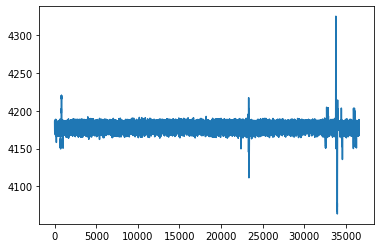

In [ ]:
plt.plot(S1.eeg.iloc[:,[1]])

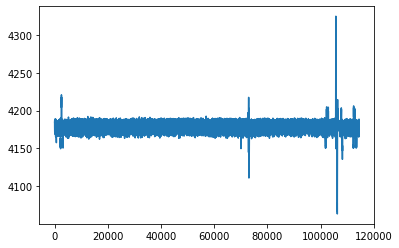

In [ ]:
plt.plot(S1.eeg_fft.iloc[:,[1]])